In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import string

In [25]:
dataset = pd.read_csv('dataset/articles2.csv')
dataset

,jid,aid,date,title,desc
0,10003,oai:ojs2.dev.ejurnal.stkip-pessel.ac.id/:artic...,2023-08-30,ASSESSMENT OF COMPUTATIONAL THINKING: SEBUAH K...,The main objective of this study was to conduc...
1,10003,oai:ojs2.dev.ejurnal.stkip-pessel.ac.id/:artic...,2023-08-30,EXPLORING THE DIGITAL LEARNING MATERIALS NEEDS...,This research aimed to explore the need for di...
2,10003,oai:ojs2.dev.ejurnal.stkip-pessel.ac.id/:artic...,2023-08-30,KAJIAN LITERATUR SISTEMATIS TENTANG UPAYA MENI...,Computational thinking (CT) has gained attenti...
3,10003,oai:ojs2.dev.ejurnal.stkip-pessel.ac.id/:artic...,2023-08-30,MANAJEMEN EVALUASI PENDIDIKAN BERBASIS TEKNOLO...,Education is a determinant of the progress of ...
4,10003,oai:ojs2.dev.ejurnal.stkip-pessel.ac.id/:artic...,2023-08-30,MELALUI METODE DISKUSI DENGAN MEDIA GAMBAR SER...,The purpose of this study was to determine the...
...,...,...,...,...,...
2616615,9999,oai:ojs.unhas:article/25258,2023-10-11,Potential of Limestone as a Groundwater Reserv...,"The research area is in Tintingon Village, Ban..."
2616616,9999,oai:ojs.unhas:article/25371,2023-11-02,Middle Eocene Nannofossil Assemblages Respondi...,The Kei Besar Island is mainly composed of the...
2616617,9999,oai:ojs.unhas:article/25377,KOSONG,KOSONG,KOSONG
2616618,9999,oai:ojs.unhas:article/25476,2023-11-02,Assessment of Landslide Susceptibility Microzo...,"Based on the geological condition, the researc..."


In [26]:
dataset.query("desc == 'KOSONG' or title == 'KOSONG'")

,jid,aid,date,title,desc
18,10004,oai:ojs2.profood.unram.ac.id:article/6,KOSONG,KOSONG,KOSONG
19,10004,oai:ojs2.profood.unram.ac.id:article/7,KOSONG,KOSONG,KOSONG
20,10004,oai:ojs2.profood.unram.ac.id:article/10,KOSONG,KOSONG,KOSONG
49,10004,oai:ojs2.profood.unram.ac.id:article/44,KOSONG,KOSONG,KOSONG
50,10004,oai:ojs2.profood.unram.ac.id:article/46,KOSONG,KOSONG,KOSONG
...,...,...,...,...,...
2616498,9999,oai:ojs.10.0.1.236:article/1742,KOSONG,KOSONG,KOSONG
2616612,9999,oai:ojs.unhas:article/23930,KOSONG,KOSONG,KOSONG
2616614,9999,oai:ojs.unhas:article/24638,KOSONG,KOSONG,KOSONG
2616617,9999,oai:ojs.unhas:article/25377,KOSONG,KOSONG,KOSONG


In [27]:
dataset = dataset[dataset.title != 'KOSONG']
dataset = dataset[dataset.desc != 'KOSONG']
dataset.dropna(inplace=True)
dataset = dataset.reset_index(drop=True)
dataset

,jid,aid,date,title,desc
0,10003,oai:ojs2.dev.ejurnal.stkip-pessel.ac.id/:artic...,2023-08-30,ASSESSMENT OF COMPUTATIONAL THINKING: SEBUAH K...,The main objective of this study was to conduc...
1,10003,oai:ojs2.dev.ejurnal.stkip-pessel.ac.id/:artic...,2023-08-30,EXPLORING THE DIGITAL LEARNING MATERIALS NEEDS...,This research aimed to explore the need for di...
2,10003,oai:ojs2.dev.ejurnal.stkip-pessel.ac.id/:artic...,2023-08-30,KAJIAN LITERATUR SISTEMATIS TENTANG UPAYA MENI...,Computational thinking (CT) has gained attenti...
3,10003,oai:ojs2.dev.ejurnal.stkip-pessel.ac.id/:artic...,2023-08-30,MANAJEMEN EVALUASI PENDIDIKAN BERBASIS TEKNOLO...,Education is a determinant of the progress of ...
4,10003,oai:ojs2.dev.ejurnal.stkip-pessel.ac.id/:artic...,2023-08-30,MELALUI METODE DISKUSI DENGAN MEDIA GAMBAR SER...,The purpose of this study was to determine the...
...,...,...,...,...,...
945151,9999,oai:ojs.unhas:article/23889,2023-02-14,Susceptibility of the Surrounding Soil and Roc...,"The research area is located in Banga, Soppeng..."
945152,9999,oai:ojs.unhas:article/23930,2023-10-31,Presentation of Green Open Space of Makassar C...,"Green open space has three basic functions, am..."
945153,9999,oai:ojs.unhas:article/25258,2023-10-11,Potential of Limestone as a Groundwater Reserv...,"The research area is in Tintingon Village, Ban..."
945154,9999,oai:ojs.unhas:article/25371,2023-11-02,Middle Eocene Nannofossil Assemblages Respondi...,The Kei Besar Island is mainly composed of the...


In [29]:
dataset[dataset.desc.isna()]

,jid,aid,date,title,desc


In [30]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 945156 entries, 0 to 945155
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   jid     945156 non-null  int64 
 1   aid     945156 non-null  object
 2   date    945156 non-null  object
 3   title   945156 non-null  object
 4   desc    945156 non-null  object
dtypes: int64(1), object(4)
memory usage: 36.1+ MB


In [31]:
word_count = dataset.desc.apply(lambda x : len(x.split()))
word_count

0         117
1         212
2         203
3         147
4         179
         ... 
945151    202
945152    252
945153    160
945154    222
945155    216
Name: desc, Length: 945156, dtype: int64

(array([9.44259e+05, 6.78000e+02, 1.31000e+02, 4.60000e+01, 1.20000e+01,
        1.60000e+01, 5.00000e+00, 5.00000e+00, 1.00000e+00, 3.00000e+00]),
 array([1.0000e+00, 1.0967e+03, 2.1924e+03, 3.2881e+03, 4.3838e+03,
        5.4795e+03, 6.5752e+03, 7.6709e+03, 8.7666e+03, 9.8623e+03,
        1.0958e+04]),
 <BarContainer object of 10 artists>)

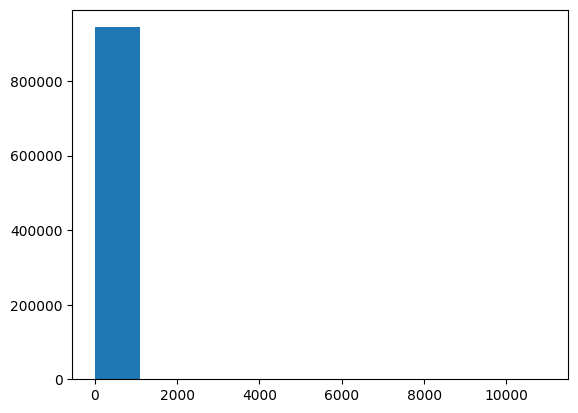

In [32]:
plt.hist(word_count)

In [33]:
dataset['word_count'] = word_count
max(dataset.word_count), min(dataset.word_count)

(10958, 1)

In [34]:
dataset.desc[dataset.word_count < 50]

769       Artikel ini berisi front-matter JTSiskom Volum...
798       Artikel ini berisi front-matter JTSiskom Volum...
809       Artikel ini berisi front-matter JTSiskom Volum...
812       Artikel ini berisi front-matter JTSiskom Volum...
822       Artikel ini berisi front-matter JTSiskom Volum...
                                ...                        
943364                                                   ..
943699    Pembentukan Pansus Angket KPK mendapat sejumla...
943747    Relasi Kuasa Pasca Pidato Politik Presiden Jok...
944329    Majelis Ulama Indonesia merupakan salah satu i...
944678    Tulisan ini merupakan kajian pustaka yang meng...
Name: desc, Length: 13391, dtype: object

(array([6418., 1590., 1763., 1129.,  280.,  343.,  333.,  362.,  507.,
         666.]),
 array([ 1. ,  5.8, 10.6, 15.4, 20.2, 25. , 29.8, 34.6, 39.4, 44.2, 49. ]),
 <BarContainer object of 10 artists>)

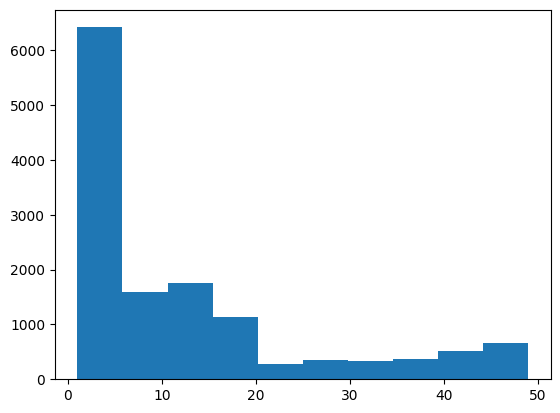

In [36]:
plt.hist(dataset[dataset.word_count < 50].word_count)

In [37]:
dataset['word_count'] = word_count
dataset[dataset.word_count > 2000]

,jid,aid,date,title,desc,word_count
8181,1015,oai:ojs.ejournal.unsrat.ac.id:article/10195,2015-11-09,ANGKA KEJADIAN STOMATITIS YANG DIDUGA SEBAGAI ...,ANGKA KEJADIAN STOMATITIS YANG DIDUGA SEBAGAI ...,3703
8182,1015,oai:ojs.ejournal.unsrat.ac.id:article/10196,2015-11-09,HUBUNGAN KEBIASAAN MENYIKAT GIGI DAN STATUS KE...,HUBUNGAN KEBIASAAN MENYIKAT GIGI DAN STATUS KE...,2984
10714,10186,oai:ojs.jurnal.unissula.ac.id:article/1119,2017-05-23,CRIMES AGAINST CHILDREN AS ACTORS,"The word ""mandate"" is quite broad sense, but d...",2447
21676,10356,oai:ojs.pkp.sfu.ca:article/10,2012-08-06,The Correlated Factors of Mandatory Social Rep...,Objective – Islamic Banking is closely related...,2177
48433,11055,oai:ojs.journal.um-surabaya.ac.id:article/3422,2020-01-21,Studi Analisis Frekuensi Santri Pondok Pesantr...,PENDAHULUANSejak zaman Rosulullah SAW sampai s...,2366
...,...,...,...,...,...,...
905866,8746,oai:jurnalunj.journal.unj.ac.id:article/34854,2023-04-30,The Impact of Father Involvement in the Early ...,Father's involvement is something that influen...,2120
905875,8746,oai:jurnalunj.journal.unj.ac.id:article/39028,2023-11-30,Parenting Skills as The Closest Teacher to Ear...,Parents play an important role in the developm...,2760
905877,8746,oai:jurnalunj.journal.unj.ac.id:article/39655,2023-11-30,"Smartphone Addiction, Executive Function, and ...",Early childhood emotional dysregulation is cri...,3509
943686,9969,oai:ojs.publikasi.mercubuana.ac.id:article/22519,2024-02-29,Strategi Komunikasi BPP (Balai Penyuluhan Pert...,Strategi Komunikasi BPP (Balai Penyuluhan Pert...,2770


In [24]:
def bersihkan_abstrak(teks):
    teks = teks.lower()
    
    # Membagi teks berdasarkan kata "ABSTRAK"
    abstrak_bersih = re.split(r'abstrak|abstract', teks)[-1].strip()

    # Membagi teks hasil pemisahan dengan menggunakan '\n' untuk mendapatkan baris-baris yang terpisah
    baris = re.split(r'\n|\.\s|\.', abstrak_bersih)

    # # Menghapus baris yang mengandung kata kunci "Kata kunci" atau "kata kunci:"
    # baris_bersih = [line for line in baris if not line.startswith('kata kunci')]

    # Menggabungkan baris-baris yang tersisa kembali menjadi teks yang bersih
    abstrak_bersih = ' '.join(baris).strip()

    # Menghapus tag nbsp pada text
    abstrak_bersih = abstrak_bersih.replace("&nbsp;", '')

    # Menghapus simbol spesial yang ada pada text
    abstrak_bersih = abstrak_bersih.translate(str.maketrans('', '', 'å¼«¥ª°©ð±œ§µ½ºé/èšˆçžãƒÿ¾æ¹¢³¿β®äâ£'))

    # Hanya mengambil huruf alphanumeric
    abstrak_bersih = re.sub(r'[^ \w+]', '', abstrak_bersih)

    # Filtering angka
    abstrak_bersih = re.sub('\d+', '', abstrak_bersih)

    # menghapus punctuation pada teks
    abstrak_bersih = abstrak_bersih.translate(str.maketrans('', '', string.punctuation))

    # # Mengambil data sebelum ditemukan keyword 'kata kunci'
    # posisi_kata_kunci = abstrak_bersih.find('kata kunci')
    
    # # Jika kata kunci ditemukan, maka teks setelahnya akan dihapus
    # if posisi_kata_kunci != -1:
    #     abstrak_bersih = abstrak_bersih[:posisi_kata_kunci]

    abstrak_bersih = re.sub('(kata kunci|keywords|keyword).*', '', abstrak_bersih)

    return abstrak_bersih

In [16]:
# sample = data[data.word_count > 2000].sample()
sample = dataset.sample()
desc = sample.desc.values[0]
sample.jid.values[0], desc, 'filtered', bersihkan_abstrak(desc), sample.word_count.values[0]

(5046,
 'The high potential of fisheries in Banyuwangi has caused many canned sardine processing industries to be established, one of which is PT. Sumber Yalasamudra in Muncar District. In recent years the population of lemuru fish has decreased so that PT. Sumber Yalasamudra must be able to carry out good supply chain management so that the production process continues to run smoothly. This study aimed to analyze the supply chain flow and supply chain performance of PT. Sumber Yalasamudra. The research method used descriptive analysis to explain supply chain flow and SCOR analysis to measure supply chain performance of PT. Sumber Yalasamudra. The results of the analysis showed that the supply chain flow of PT. Sumber Yalasamudra are divided into 3 streams, namely (a) product flows from fishermen to final consumers (buyers), (b) financial flows flowing from downstream to upstream in cash with a period of time and (c) information flows flowing from upstream to downstream and vice versa,

In [3]:
data_id_5k = pd.read_csv('dataset/dataset_jurnal_indo_5k.csv')
data_id_5k = data_id_5k[data_id_5k.desc != 'KOSONG']
data_id_5k.dropna(inplace=True)
data_id_5k = data_id_5k.reset_index(drop=True)
data_id_5k

,jid,aid,date,title,desc,abstrac_clean
0,10004,oai:ojs2.profood.unram.ac.id:article/11,2017-03-17,EFEKTIVITAS PERLAKUAN OZON TERHADAP MUTU KANGK...,The aimed of this research was to investigate ...,penelitian ini bertujuan untuk menentukan meto...
1,10004,oai:ojs2.profood.unram.ac.id:article/12,2017-03-17,PENYIMPANAN MANGGA SECARA MODIFIKASI ATMOSFI...,Modified Atmosphere Storage of Mango with Ca(O...,penelitian tentang “penyimpanan mangga secara...
2,10004,oai:ojs2.profood.unram.ac.id:article/13,2017-03-17,PENGARUH RASIO SUSU FULL CREAM DENGAN JAGUNG ...,The aimed of this research was to determine th...,penelitian ini bertujuan untuk mengetahui peng...
3,10004,oai:ojs2.profood.unram.ac.id:article/14,2017-03-17,KAJIAN MUTU DAN DAYA SIMPAN KEJU MOZZARELLA PR...,This study aims to determine the best probioti...,penelitian ini bertujuan untuk mengetahui kons...
4,10004,oai:ojs2.profood.unram.ac.id:article/15,2017-03-17,PENGARUH PENAMBAHAN PROBIOTIK (Lactobacillus c...,Mozzarella cheese is one of the Italian cheese...,keju mozarella salah satu keju khas italia yan...
...,...,...,...,...,...,...
4993,10480,oai:ojs.forikes-ejournal.com:article/623,2019-12-23,Efek Pemberian Depo Medroxy Progesteron Acetat...,Long term DMPA usage causes impaired estrogen ...,penggunaan dmpa jangka panjang menghambat perl...
4994,10480,oai:ojs.forikes-ejournal.com:article/1727,2021-11-30,Faktor yang Berhubungan dengan Stigma Masyarak...,Stigma and discrimination as well as changes i...,stigma and discrimination as well as changes i...
4995,10480,oai:ojs.forikes-ejournal.com:article/901,2020-07-28,Faktor-faktor yang Mempengaruhi Kepatuhan Peng...,Background: The biggest problem of transmissio...,latar belakang: masalah terbesar penularan pen...
4996,10480,oai:ojs.forikes-ejournal.com:article/1460,2021-07-14,Kurma Sebagai Alternatif untuk Meningkatkan Ka...,Anemia is the main cause of the high maternal ...,anemia adalah penyebab utama angka kematian ib...


In [25]:
data = data_id_5k.desc.apply(bersihkan_abstrak)
data

0       penelitian ini bertujuan untuk menentukan meto...
1       penelitian tentang penyimpanan mangga secara m...
2       penelitian ini bertujuan untuk mengetahui peng...
3       penelitian ini bertujuan untuk mengetahui kons...
4       keju mozarella salah satu keju khas italia yan...
                              ...                        
4993    penggunaan dmpa jangka panjang menghambat perl...
4994    stigma dan diskriminasi serta perubahan pola h...
4995    latar belakang masalah terbesar penularan peny...
4996    anemia adalah penyebab utama angka kematian ib...
4997    standar kelengkapan pengisian dokumen rekam me...
Name: desc, Length: 4998, dtype: object

In [26]:
wc = data.apply(lambda x : len(x.split()))
min(wc), max(wc)

(0, 620)

In [27]:
data_id_5k['wc'] = wc
data_id_5k['abstrac_clean2'] = data
data_id_5k


,jid,aid,date,title,desc,abstrac_clean,wc,abstrac_clean2
0,10004,oai:ojs2.profood.unram.ac.id:article/11,2017-03-17,EFEKTIVITAS PERLAKUAN OZON TERHADAP MUTU KANGK...,The aimed of this research was to investigate ...,penelitian ini bertujuan untuk menentukan meto...,225,penelitian ini bertujuan untuk menentukan meto...
1,10004,oai:ojs2.profood.unram.ac.id:article/12,2017-03-17,PENYIMPANAN MANGGA SECARA MODIFIKASI ATMOSFI...,Modified Atmosphere Storage of Mango with Ca(O...,penelitian tentang “penyimpanan mangga secara...,188,penelitian tentang penyimpanan mangga secara m...
2,10004,oai:ojs2.profood.unram.ac.id:article/13,2017-03-17,PENGARUH RASIO SUSU FULL CREAM DENGAN JAGUNG ...,The aimed of this research was to determine th...,penelitian ini bertujuan untuk mengetahui peng...,200,penelitian ini bertujuan untuk mengetahui peng...
3,10004,oai:ojs2.profood.unram.ac.id:article/14,2017-03-17,KAJIAN MUTU DAN DAYA SIMPAN KEJU MOZZARELLA PR...,This study aims to determine the best probioti...,penelitian ini bertujuan untuk mengetahui kons...,164,penelitian ini bertujuan untuk mengetahui kons...
4,10004,oai:ojs2.profood.unram.ac.id:article/15,2017-03-17,PENGARUH PENAMBAHAN PROBIOTIK (Lactobacillus c...,Mozzarella cheese is one of the Italian cheese...,keju mozarella salah satu keju khas italia yan...,183,keju mozarella salah satu keju khas italia yan...
...,...,...,...,...,...,...,...,...
4993,10480,oai:ojs.forikes-ejournal.com:article/623,2019-12-23,Efek Pemberian Depo Medroxy Progesteron Acetat...,Long term DMPA usage causes impaired estrogen ...,penggunaan dmpa jangka panjang menghambat perl...,169,penggunaan dmpa jangka panjang menghambat perl...
4994,10480,oai:ojs.forikes-ejournal.com:article/1727,2021-11-30,Faktor yang Berhubungan dengan Stigma Masyarak...,Stigma and discrimination as well as changes i...,stigma and discrimination as well as changes i...,181,stigma dan diskriminasi serta perubahan pola h...
4995,10480,oai:ojs.forikes-ejournal.com:article/901,2020-07-28,Faktor-faktor yang Mempengaruhi Kepatuhan Peng...,Background: The biggest problem of transmissio...,latar belakang: masalah terbesar penularan pen...,85,latar belakang masalah terbesar penularan peny...
4996,10480,oai:ojs.forikes-ejournal.com:article/1460,2021-07-14,Kurma Sebagai Alternatif untuk Meningkatkan Ka...,Anemia is the main cause of the high maternal ...,anemia adalah penyebab utama angka kematian ib...,195,anemia adalah penyebab utama angka kematian ib...


In [35]:
sample = data_id_5k.sample().index
data_id_5k.desc[sample].values[0], data_id_5k.abstrac_clean2[sample].values[0]

("Abstract: Family dental health care is a series of activities provided by dental practitioners to help solving dental health problems. This study was aimed to assess family dental care effectiveness on changes in dental and oral health as well as caries index of children. This was a quasi-experimental study. There were 23 respondents of SDN 12 as the intervention group and 23 respondents of SDN 60 Banda Aceh as the control group, together with their parents. The intervention group was given dental health education and home visit while the control group was not. The results showed no significant difference in knowledge, attitudes, and actions of the children and parents as well as children's dental hygiene status (OHIS) and children's dental caries status (DMF-T) between groups before intervention. After the family dental nursing care was carried out, there were significant differences in knowledge, attitudes, and actions of the children and parents as well as OHIS and DMF-T at three 

In [22]:
data_1005 = data_id_5k[data_id_5k.jid == 1005]
data_1005

,jid,aid,date,title,desc,abstrac_clean,wc,abstrac_clean2
720,1005,oai:ojs.ejournal.unsrat.ac.id:article/3762,2013-12-31,KESALAHAN GRAMATIKAL DALAM ABSTRAK SKRIPSI DAR...,ABSTRACT This research is entitled â€œKesalaha...,skripsi dari lulusan fakultas sastraâ€ is an ...,35,in which the error of misinformation is the mo...
721,1005,oai:ojs.ejournal.unsrat.ac.id:article/4867,2014-05-05,KOHESI GRAMATIKAL DALAM INJIL YOHANES (Sebuah ...,ABSTRAKTION In dieser Untersuchung wurdeDi...,tion in dieser untersuchung wurdedie kohã¤...,154,tion in dieser untersuchung wurdedie kohsi...
722,1005,oai:ojs.ejournal.unsrat.ac.id:article/5045,2014-07-16,ANALISIS KESALAHAN DALAM PENULISAN KARANGAN N...,Abstrak This skripsi entitled â€œAnalisis Kesa...,this skripsi entitled â€œanalisis kesalahan da...,174,this skripsi entitled analisis kesalahan dalam...
723,1005,oai:ojs.ejournal.unsrat.ac.id:article/5308,2014-08-11,KALIMAT NEGATIF DALAM BAHASA INGGRIS DAN BAHAS...,ABSTRAK The research entitled â€œNegative Se...,the research entitled â€œnegative sentence in ...,164,the research entitled negative sentence in eng...
724,1005,oai:ojs.ejournal.unsrat.ac.id:article/5738,2014-10-01,PREPOSISI AKKUSATIV DAN DATIV DALAM KITAB INJ...,ABSTRAKTION Diese Untersuchung behandelt si...,tion diese untersuchung behandelt sich ã¼be...,159,tion diese untersuchung behandelt sich ber ...
...,...,...,...,...,...,...,...,...
830,1005,oai:ojs.ejournal.unsrat.ac.id:article/42932,2022-07-28,BENTUK PERMINTAAN SOPAN SANTUN DALAM BAHASA IN...,BENTUK PERMINTAAN SOPAN SANTUN DALAM BAHASA IN...,â â â this research entitled â€œpermintaan s...,259,this research entitled permintaan sopan santun...
831,1005,oai:ojs.ejournal.unsrat.ac.id:article/42934,2022-07-29,ISTILAH KEKERABATAN DALAM BAHASA INGGRIS DAN B...,Â Â Â Â Â Â Â Â ISTILAH KEKERABATAN DA...,â â â this research is an attempt to describ...,238,this research is an attempt to describe and an...
832,1005,oai:ojs.ejournal.unsrat.ac.id:article/42942,2022-08-02,SEJARAH PACUAN KUDA DI KECAMATAN TOMPASO KABUP...,Â Â Â Â Â Â Â Â Â Â Â Â Â Â Â Â...,sejarah pacuan kuda di kecamatan tompaso kabup...,152,history of horse racing in tompaso district of...
833,1005,oai:ojs.ejournal.unsrat.ac.id:article/43032,2022-08-03,"ANALISIS STRUKTUR ALUR NOVEL PETJAH, SATU DARI...",Â Â Â Â Â Â Â Â Â Â Â Â Â Â Â Â...,â â â kripsi ini membahas struktur alur nove...,216,kripsi ini membahas struktur alur novel petjah...


In [23]:
data_1005.abstrac_clean2.to_csv('dataset/data1005_desc.csv')

In [21]:
valid_data = data_id_5k[data_id_5k.wc > 50]
valid_data = valid_data[valid_data.wc < 300]
valid_data.reset_index(drop=True, inplace=True)
valid_data

,jid,aid,date,title,desc,abstrac_clean,wc,abstrac_clean2
0,10004,oai:ojs2.profood.unram.ac.id:article/11,2017-03-17,EFEKTIVITAS PERLAKUAN OZON TERHADAP MUTU KANGK...,The aimed of this research was to investigate ...,penelitian ini bertujuan untuk menentukan meto...,223,penelitian ini bertujuan untuk menentukan meto...
1,10004,oai:ojs2.profood.unram.ac.id:article/12,2017-03-17,PENYIMPANAN MANGGA SECARA MODIFIKASI ATMOSFI...,Modified Atmosphere Storage of Mango with Ca(O...,penelitian tentang “penyimpanan mangga secara...,189,penelitian tentang penyimpanan mangga secara ...
2,10004,oai:ojs2.profood.unram.ac.id:article/13,2017-03-17,PENGARUH RASIO SUSU FULL CREAM DENGAN JAGUNG ...,The aimed of this research was to determine th...,penelitian ini bertujuan untuk mengetahui peng...,199,penelitian ini bertujuan untuk mengetahui peng...
3,10004,oai:ojs2.profood.unram.ac.id:article/14,2017-03-17,KAJIAN MUTU DAN DAYA SIMPAN KEJU MOZZARELLA PR...,This study aims to determine the best probioti...,penelitian ini bertujuan untuk mengetahui kons...,163,penelitian ini bertujuan untuk mengetahui kons...
4,10004,oai:ojs2.profood.unram.ac.id:article/15,2017-03-17,PENGARUH PENAMBAHAN PROBIOTIK (Lactobacillus c...,Mozzarella cheese is one of the Italian cheese...,keju mozarella salah satu keju khas italia yan...,183,keju mozarella salah satu keju khas italia yan...
...,...,...,...,...,...,...,...,...
4905,10480,oai:ojs.forikes-ejournal.com:article/623,2019-12-23,Efek Pemberian Depo Medroxy Progesteron Acetat...,Long term DMPA usage causes impaired estrogen ...,penggunaan dmpa jangka panjang menghambat perl...,169,penggunaan dmpa jangka panjang menghambat perl...
4906,10480,oai:ojs.forikes-ejournal.com:article/1727,2021-11-30,Faktor yang Berhubungan dengan Stigma Masyarak...,Stigma and discrimination as well as changes i...,stigma and discrimination as well as changes i...,180,stigma dan diskriminasi serta perubahan pola h...
4907,10480,oai:ojs.forikes-ejournal.com:article/901,2020-07-28,Faktor-faktor yang Mempengaruhi Kepatuhan Peng...,Background: The biggest problem of transmissio...,latar belakang: masalah terbesar penularan pen...,85,latar belakang masalah terbesar penularan peny...
4908,10480,oai:ojs.forikes-ejournal.com:article/1460,2021-07-14,Kurma Sebagai Alternatif untuk Meningkatkan Ka...,Anemia is the main cause of the high maternal ...,anemia adalah penyebab utama angka kematian ib...,195,anemia adalah penyebab utama angka kematian ib...


In [22]:
data_10004 = valid_data[valid_data.jid == 10004]
data_10004.reset_index(drop=True, inplace=True)
data = data_10004.abstrac_clean2
data

0      penelitian ini bertujuan untuk menentukan meto...
1       penelitian tentang penyimpanan mangga secara ...
2      penelitian ini bertujuan untuk mengetahui peng...
3      penelitian ini bertujuan untuk mengetahui kons...
4      keju mozarella salah satu keju khas italia yan...
                             ...                        
104    salah satu enzim utama berpotensi menyumbang k...
105    yoghurt adalah minuman yang terbuat dari prose...
106    penelitian ini bertujuan untuk menganalisis mu...
107    penelitian ini bertujuan untuk menganalisis mu...
108    kombucha sari apel merupakan minuman fermentas...
Name: abstrac_clean2, Length: 109, dtype: object

In [30]:
import torch
from transformers import BertTokenizer, AutoModel
from sklearn.cluster import KMeans
import numpy as np

# Load pre-trained IndoBERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')
model = AutoModel.from_pretrained('bert-base-multilingual-cased')

In [31]:
def tokenize_data(texts, tokenizer, max_length=128):
    input_ids = []
    attention_masks = []

    for text in texts:
        encoded_dict = tokenizer.encode_plus(
                            text,
                            add_special_tokens=True,
                            max_length=max_length,
                            pad_to_max_length=True,
                            return_attention_mask=True,
                            return_tensors='pt'
                       )
        input_ids.append(encoded_dict['input_ids'])
        attention_masks.append(encoded_dict['attention_mask'])

    input_ids = torch.cat(input_ids, dim=0)
    attention_masks = torch.cat(attention_masks, dim=0)

    return input_ids, attention_masks

In [32]:
input_ids, attention_masks = tokenize_data(data, tokenizer)
input_ids

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
c:\Users\LENOVO\GitHub\tugas_akhir\.venv\lib\site-packages\transformers\tokenization_utils_base.py:2645: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


tensor([[   101, 103368,  10592,  ...,  27808,  10589,    102],
        [   101, 103368,  23340,  ...,  11309,    116,    102],
        [   101, 103368,  10592,  ...,  39429,  17146,    102],
        ...,
        [   101, 103368,  10592,  ...,  10376,  45122,    102],
        [   101, 103368,  10592,  ...,  10284,  94618,    102],
        [   101,  12240,  23126,  ...,  39465,  88056,    102]])

In [33]:
from torch.utils.data import Dataset, DataLoader

# Buat dataloader
class ArticleDataset(Dataset):
    def __init__(self, input_ids, attention_masks):
        self.input_ids = input_ids
        self.attention_masks = attention_masks

    def __getitem__(self, idx):
        return {
            'input_ids': self.input_ids[idx],
            'attention_mask': self.attention_masks[idx]
        }

    def __len__(self):
        return len(self.input_ids)

dataset = ArticleDataset(input_ids, attention_masks)

In [34]:
batch_size = 32
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False)

In [35]:
import torch

device = 'cpu'
if torch.cuda.is_available() :
    device = 'cuda'

model.to(device)

# Set model ke mode evaluasi (non-training)
model.eval()

# Embedding
embeddings = []

with torch.no_grad():
    for batch in dataloader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)

        outputs = model(input_ids, attention_mask=attention_mask)
        last_hidden_states = outputs.last_hidden_state

        embeddings.append(last_hidden_states.cpu().numpy())

embeddings = np.concatenate(embeddings, axis=0)
embeddings

array([[[-6.96678385e-02, -6.44579232e-02,  7.33469725e-02, ...,
          2.26080909e-01,  1.47756785e-01,  5.57716563e-02],
        [ 2.00077310e-01, -1.01303414e-01,  8.44635606e-01, ...,
          7.13739395e-01,  2.70869195e-01,  3.25030982e-01],
        [ 4.56643999e-01, -3.64963830e-01,  1.11711299e+00, ...,
          9.56343234e-01, -1.69143975e-01,  2.22204894e-01],
        ...,
        [-4.52104777e-01, -3.30709338e-01,  7.37708569e-01, ...,
          1.15329728e-01,  6.84853554e-01, -8.38186890e-02],
        [-6.75961971e-01, -7.03311205e-01,  7.25849390e-01, ...,
          3.89349699e-01,  2.49031261e-01, -2.66736686e-01],
        [-1.34683728e-01, -2.27674231e-01,  5.97995400e-01, ...,
          2.89724290e-01,  3.21273386e-01,  1.41318858e-01]],

       [[ 4.32263054e-02, -1.27508998e-01,  1.53160334e-01, ...,
          3.96168306e-02,  2.92596221e-03, -1.06164128e-01],
        [-2.03774739e-02, -1.02028348e-01,  4.20530379e-01, ...,
          5.27785778e-01, -1.37531072e

In [36]:
embeddings.shape

(109, 128, 768)

In [37]:
from sklearn.decomposition import PCA

# Mengubah array embeddings menjadi matriks dua dimensi
X = embeddings.reshape(embeddings.shape[0], -1)
X, X.shape

(array([[-0.06966784, -0.06445792,  0.07334697, ...,  0.2897243 ,
          0.3212734 ,  0.14131886],
        [ 0.04322631, -0.127509  ,  0.15316033, ..., -0.11701608,
          0.137185  , -0.13153064],
        [ 0.03749651,  0.02143019,  0.07575245, ...,  0.00547711,
          0.15312089, -0.11732959],
        ...,
        [ 0.16177833, -0.30813885,  0.20065248, ...,  0.9355677 ,
          0.48229378, -0.1906779 ],
        [ 0.00515796, -0.12993437,  0.11466092, ...,  0.71100533,
          0.44130033,  0.0296791 ],
        [-0.09940216, -0.03029878,  0.04671875, ..., -0.12547971,
          0.11357938, -0.21363983]], dtype=float32),
 (109, 98304))

In [38]:
pca = PCA(n_components=2, random_state=0)
pca_result = pca.fit_transform(X)
pca_result, pca_result.shape

(array([[-26.26479   , -11.856453  ],
        [ 37.721085  ,  -3.3903089 ],
        [ 35.51639   , -26.749163  ],
        [-18.224663  , -10.108707  ],
        [-13.158152  ,  41.62285   ],
        [ 13.747311  , -33.038578  ],
        [-19.71993   ,  31.84576   ],
        [ 34.732136  , -16.335283  ],
        [-32.19525   , -36.43135   ],
        [ 39.353794  ,   8.030563  ],
        [-25.454462  , -22.716963  ],
        [-21.004316  ,  19.019505  ],
        [ 32.305573  , -36.026688  ],
        [ 35.439026  , -21.647528  ],
        [-23.513857  ,  35.51799   ],
        [ 37.918407  , -29.950867  ],
        [ 44.410255  ,   5.314736  ],
        [-41.850437  , -32.27861   ],
        [-19.372702  , -31.365326  ],
        [-26.676722  , -15.01287   ],
        [-31.452463  , -35.370087  ],
        [-38.54011   , -28.517353  ],
        [ 32.911877  , -30.001158  ],
        [-20.134125  ,  35.592022  ],
        [  6.7075734 , -21.062597  ],
        [ 44.476685  ,  11.090387  ],
        [-22

<Axes: xlabel='Dimension 1', ylabel='Dimension 2'>

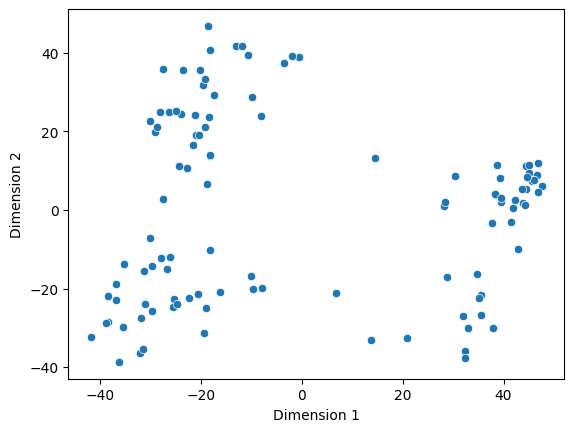

In [39]:
import seaborn as sns

df_pca = pd.DataFrame(pca_result, columns=['Dimension 1', 'Dimension 2'])
sns.scatterplot(x='Dimension 1', y='Dimension 2', data=df_pca)


In [40]:
num_clusters = 1
kmeans_normal = KMeans(n_clusters=num_clusters, random_state=0)
kmeans_normal_output = kmeans_normal.fit_transform(X)
kmeans_normal_output, kmeans_normal_output.shape

(array([[141.51265],
        [152.43982],
        [150.89282],
        [152.87738],
        [156.19093],
        [144.23041],
        [150.36345],
        [137.7845 ],
        [150.97708],
        [140.51418],
        [143.14694],
        [144.8143 ],
        [137.95938],
        [134.79092],
        [147.48692],
        [148.62677],
        [144.44284],
        [140.4552 ],
        [160.6783 ],
        [160.6685 ],
        [148.41872],
        [149.18411],
        [141.63594],
        [153.78456],
        [138.43561],
        [141.68822],
        [146.78111],
        [148.58145],
        [148.38713],
        [148.93086],
        [148.81886],
        [160.78424],
        [135.11728],
        [158.02312],
        [147.12819],
        [142.5844 ],
        [138.2634 ],
        [141.70992],
        [157.71672],
        [148.44763],
        [146.03568],
        [135.92398],
        [145.39555],
        [153.8358 ],
        [147.02956],
        [151.11627],
        [142.62608],
        [149.

In [41]:
# kmeans_pca = KMeans(n_clusters=num_clusters, random_state=0)
# kmeans_pca_output = kmeans_pca.fit_transform(pca_result)
# kmeans_pca_output

In [42]:
centroid_normal = kmeans_normal.cluster_centers_
# centroid_pca = kmeans_pca.cluster_centers_

In [43]:
cluster_labels_normal = kmeans_normal.labels_
# cluster_labels_pca = kmeans_pca.labels_


In [44]:
centroid_normal = kmeans_normal.cluster_centers_
# centroid_pca = kmeans_pca.cluster_centers_

treshold_normal = np.mean(kmeans_normal_output.squeeze()) + 2 * np.std(kmeans_normal_output.squeeze())
# treshold_pca = np.mean(kmeans_pca_output.squeeze()) + 2 * np.std(kmeans_pca_output.squeeze())

scoop_data_normal = X[kmeans_normal_output.squeeze() <= treshold_normal]
outscoop_data_normal = X[kmeans_normal_output.squeeze() > treshold_normal]

# scoop_data_pca = X[kmeans_pca_output.squeeze() <= treshold_pca]
# outscoop_data_pca = X[kmeans_pca_output.squeeze() > treshold_pca]

In [45]:
scoop_labels_normal = np.ones(len(X))
scoop_labels_normal[kmeans_normal_output.squeeze() > treshold_normal] = -1

# scoop_labels_pca = np.ones(len(pca_result))
# scoop_labels_pca[kmeans_pca_output.squeeze() > treshold_pca] = -1

In [46]:
def plot_vector_distribution(vector_representation, centroids, kmeans_labels, scoop_labels, new_point = None):
    pca = PCA(n_components=2, random_state=0)
    pca_result = pca.fit_transform(vector_representation)

    df_pca = pd.DataFrame(pca_result, columns=['Dimension 1', 'Dimension 2'])
    # df_pca['Cluster Label'] = kmeans_labels
    df_pca['Scoop Label'] = scoop_labels

    cluster_palette = sns.color_palette('tab10', n_colors=len(np.unique(kmeans_labels)))
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='Dimension 1', y='Dimension 2', hue='Scoop Label', style='Scoop Label', data=df_pca, palette=cluster_palette, markers=['o', 'X'], legend='full')
    
    # Menambahkan centroid ke dalam plot
    centroids = pca.transform(centroids)
    print(centroids)
    plt.scatter(centroids[0][0], centroids[0][1], marker='^', c='red', s=50, label='Centroids')

    if new_point is not None:
        plt.scatter(new_point[0][0], new_point[0][1], marker='^', c='blue', s=50, label='new_point')
    
    plt.title('PCA Latent Representation with Centroids')
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.legend()
    plt.show()

    return df_pca



C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9596\1306986725.py:11: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x='Dimension 1', y='Dimension 2', hue='Scoop Label', style='Scoop Label', data=df_pca, palette=cluster_palette, markers=['o', 'X'], legend='full')


[[-4.4005817e-09  3.4553331e-08]]


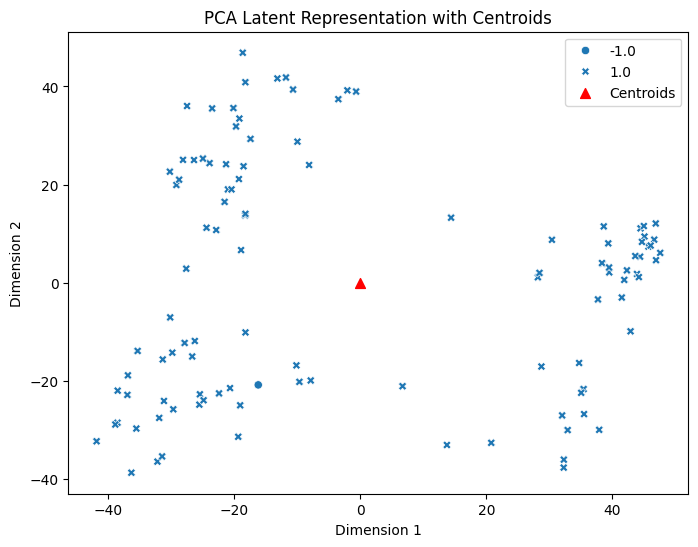

In [47]:

df_pca_normal = plot_vector_distribution(X, centroid_normal, kmeans_normal.labels_, scoop_labels_normal)

In [48]:
# df_pca_pca = plot_vector_distribution(pca_result, centroid_pca, kmeans_pca.labels_, scoop_labels_pca)

In [49]:
pca = PCA(n_components=2, random_state=0)
pca_result = pca.fit_transform(X)

def predict_pipeline(new_abs, kmeans, pca, tokenizer, treshold):
    processed_text = bersihkan_abstrak(new_abs)

    encoded_dict = tokenizer.encode_plus(
        processed_text,
        add_special_tokens=True,
        max_length=128,
        pad_to_max_length=True,
        return_attention_mask=True,
        return_tensors='pt'
    )

    # Calculate embedding for new data
    input_ids = encoded_dict['input_ids'].to(device)
    attention_mask = encoded_dict['attention_mask'].to(device)

    with torch.no_grad():
        outputs = model(input_ids, attention_mask=attention_mask)
        last_hidden_states = outputs.last_hidden_state
        new_embedding = last_hidden_states.cpu().numpy().reshape(1, -1)

    distance = kmeans.transform(new_embedding).squeeze()

    pca_new_embedding = pca.transform(new_embedding)

    if distance <= treshold:
        prediction = "in scoop"
    else:
        prediction = "out scoop"

    return prediction, pca_new_embedding


abs = "asdfa"
prediction, new_point = predict_pipeline(abs, kmeans_normal, pca, tokenizer, treshold_normal)
prediction, new_point

c:\Users\LENOVO\GitHub\tugas_akhir\.venv\lib\site-packages\transformers\tokenization_utils_base.py:2645: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


('in scoop', array([[15.4149   ,  0.9632664]], dtype=float32))

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9596\1306986725.py:11: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x='Dimension 1', y='Dimension 2', hue='Scoop Label', style='Scoop Label', data=df_pca, palette=cluster_palette, markers=['o', 'X'], legend='full')


[[-4.4005817e-09  3.4553331e-08]]


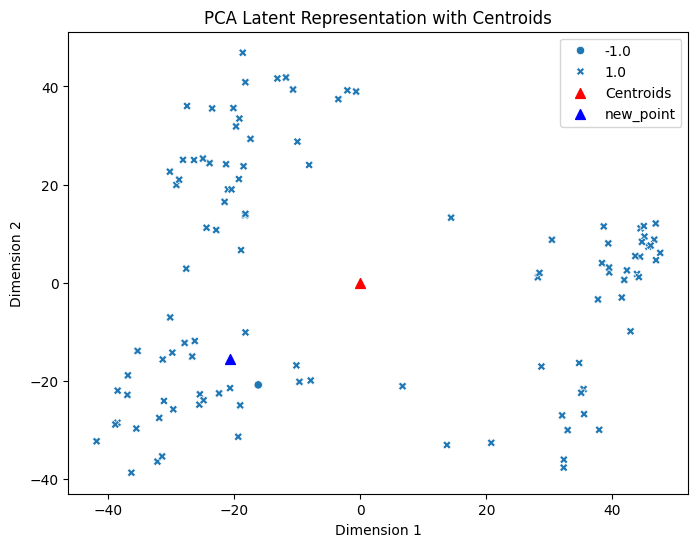

In [76]:

df_pca_normal = plot_vector_distribution(X, centroid_normal, kmeans_normal.labels_, scoop_labels_normal, new_point)

In [51]:
len(scoop_labels_normal)

109

In [52]:
data_10004['scoop'] = scoop_labels_normal
data_10004

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9596\161066407.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_10004['scoop'] = scoop_labels_normal


,jid,aid,date,title,desc,abstrac_clean,wc,abstrac_clean2,scoop
0,10004,oai:ojs2.profood.unram.ac.id:article/11,2017-03-17,EFEKTIVITAS PERLAKUAN OZON TERHADAP MUTU KANGK...,The aimed of this research was to investigate ...,penelitian ini bertujuan untuk menentukan meto...,225,penelitian ini bertujuan untuk menentukan meto...,1.0
1,10004,oai:ojs2.profood.unram.ac.id:article/12,2017-03-17,PENYIMPANAN MANGGA SECARA MODIFIKASI ATMOSFI...,Modified Atmosphere Storage of Mango with Ca(O...,penelitian tentang “penyimpanan mangga secara...,189,penelitian tentang penyimpanan mangga secara ...,1.0
2,10004,oai:ojs2.profood.unram.ac.id:article/13,2017-03-17,PENGARUH RASIO SUSU FULL CREAM DENGAN JAGUNG ...,The aimed of this research was to determine th...,penelitian ini bertujuan untuk mengetahui peng...,200,penelitian ini bertujuan untuk mengetahui pen...,1.0
3,10004,oai:ojs2.profood.unram.ac.id:article/14,2017-03-17,KAJIAN MUTU DAN DAYA SIMPAN KEJU MOZZARELLA PR...,This study aims to determine the best probioti...,penelitian ini bertujuan untuk mengetahui kons...,164,penelitian ini bertujuan untuk mengetahui kon...,1.0
4,10004,oai:ojs2.profood.unram.ac.id:article/15,2017-03-17,PENGARUH PENAMBAHAN PROBIOTIK (Lactobacillus c...,Mozzarella cheese is one of the Italian cheese...,keju mozarella salah satu keju khas italia yan...,183,keju mozarella salah satu keju khas italia ya...,1.0
...,...,...,...,...,...,...,...,...,...
104,10004,oai:ojs2.profood.unram.ac.id:article/205,2022-01-15,KARAKTERISASI BAKTERI LIPOLITIK Bacillus sp. P...,ABSTRACT\nOne of the leading enzymes having th...,salah satu enzim utama berpotensi menyumbang k...,212,salah satu enzim utama berpotensi menyumbang k...,1.0
105,10004,oai:ojs2.profood.unram.ac.id:article/209,2022-01-24,Kajian Penambahan Ubi Jalar Ungu (Ipomoea bata...,ABSTRACT\nYoghurt is a drink made from the fer...,yoghurt adalah minuman yang terbuat dari prose...,168,yoghurt adalah minuman yang terbuat dari prose...,1.0
106,10004,oai:ojs2.profood.unram.ac.id:article/215,2021-12-31,KARAKTERISASI MUTU TEH HITAM METODE CTC (Crush...,Abstract\nThis study aims to test the quality ...,penelitian ini bertujuan untuk menganalisis mu...,113,penelitian ini bertujuan untuk menganalisis mu...,1.0
107,10004,oai:ojs2.profood.unram.ac.id:article/225,2022-01-15,"ANALISIS MUTU KIMIA, MIKROBIOLOGI DAN ORGANOLE...",ABSTRACT\nThis study was aimed to analyze the ...,penelitian ini bertujuan untuk menganalisis mu...,174,penelitian ini bertujuan untuk menganalisis mu...,1.0


In [53]:
data_10004[data_10004.scoop == -1.0]

,jid,aid,date,title,desc,abstrac_clean,wc,abstrac_clean2,scoop
48,10004,oai:ojs2.profood.unram.ac.id:article/87,2018-11-30,"RASIO TEPUNG TAPIOKA, TEPUNG KETAN DAN TEPUNG ...",ABSTRACT\n&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;...,tujuan dari penelitian ini adalah untuk menget...,216,tujuan dari penelitian ini adalah untuk menget...,-1.0


In [54]:
data_10004[data_10004.scoop == 1.0]

,jid,aid,date,title,desc,abstrac_clean,wc,abstrac_clean2,scoop
0,10004,oai:ojs2.profood.unram.ac.id:article/11,2017-03-17,EFEKTIVITAS PERLAKUAN OZON TERHADAP MUTU KANGK...,The aimed of this research was to investigate ...,penelitian ini bertujuan untuk menentukan meto...,225,penelitian ini bertujuan untuk menentukan meto...,1.0
1,10004,oai:ojs2.profood.unram.ac.id:article/12,2017-03-17,PENYIMPANAN MANGGA SECARA MODIFIKASI ATMOSFI...,Modified Atmosphere Storage of Mango with Ca(O...,penelitian tentang “penyimpanan mangga secara...,189,penelitian tentang penyimpanan mangga secara ...,1.0
2,10004,oai:ojs2.profood.unram.ac.id:article/13,2017-03-17,PENGARUH RASIO SUSU FULL CREAM DENGAN JAGUNG ...,The aimed of this research was to determine th...,penelitian ini bertujuan untuk mengetahui peng...,200,penelitian ini bertujuan untuk mengetahui pen...,1.0
3,10004,oai:ojs2.profood.unram.ac.id:article/14,2017-03-17,KAJIAN MUTU DAN DAYA SIMPAN KEJU MOZZARELLA PR...,This study aims to determine the best probioti...,penelitian ini bertujuan untuk mengetahui kons...,164,penelitian ini bertujuan untuk mengetahui kon...,1.0
4,10004,oai:ojs2.profood.unram.ac.id:article/15,2017-03-17,PENGARUH PENAMBAHAN PROBIOTIK (Lactobacillus c...,Mozzarella cheese is one of the Italian cheese...,keju mozarella salah satu keju khas italia yan...,183,keju mozarella salah satu keju khas italia ya...,1.0
...,...,...,...,...,...,...,...,...,...
104,10004,oai:ojs2.profood.unram.ac.id:article/205,2022-01-15,KARAKTERISASI BAKTERI LIPOLITIK Bacillus sp. P...,ABSTRACT\nOne of the leading enzymes having th...,salah satu enzim utama berpotensi menyumbang k...,212,salah satu enzim utama berpotensi menyumbang k...,1.0
105,10004,oai:ojs2.profood.unram.ac.id:article/209,2022-01-24,Kajian Penambahan Ubi Jalar Ungu (Ipomoea bata...,ABSTRACT\nYoghurt is a drink made from the fer...,yoghurt adalah minuman yang terbuat dari prose...,168,yoghurt adalah minuman yang terbuat dari prose...,1.0
106,10004,oai:ojs2.profood.unram.ac.id:article/215,2021-12-31,KARAKTERISASI MUTU TEH HITAM METODE CTC (Crush...,Abstract\nThis study aims to test the quality ...,penelitian ini bertujuan untuk menganalisis mu...,113,penelitian ini bertujuan untuk menganalisis mu...,1.0
107,10004,oai:ojs2.profood.unram.ac.id:article/225,2022-01-15,"ANALISIS MUTU KIMIA, MIKROBIOLOGI DAN ORGANOLE...",ABSTRACT\nThis study was aimed to analyze the ...,penelitian ini bertujuan untuk menganalisis mu...,174,penelitian ini bertujuan untuk menganalisis mu...,1.0


In [55]:
np.argmin(kmeans_normal_output), kmeans_normal_output[np.argmin(kmeans_normal_output)]

(56, array([129.62845], dtype=float32))

In [56]:
np.argmax(kmeans_normal_output), kmeans_normal_output[np.argmax(kmeans_normal_output)]

(48, array([162.74518], dtype=float32))

In [57]:
data_10004.iloc[48].abstrac_clean2

'tujuan dari penelitian ini adalah untuk mengetahui pengaruh rasio tepung tapioka tepung ketan dan tepung ubi jalar ungu terhadap sifat fisikokimia dodol dengan kualitas kimia kadar air total antosianin dan kadar gula reduksi dan mutu fisik warna nilai l dan nilai ohue penelitian ini menggunakan rancangan acak kelompok rak yang terdiri dari  perlakuan t tepung tapioka  tepung ketan  tepung ubi jalar ungu  t tepung tapioka  tepung ketan  tepung ubi jalar ungu  t tepung tapioka  tepung ketan  tepung ubi jalar ungu  t tepung tapioka  tepung ketan  tepung ubi jalar ungu  t tepung tapioka  tepung ketan  tepung ubi jalar ungu  t tepung tapioka  tepung ketan  tepung ubi jalar ungu  dengan  kali pengulangan data hasil penelitian dianalisis menggunakan analisis keragaman pada taraf  menggunakan software costat dan diuji lanjut menggunakan uji beda nyata jujur bnj jika terdapat beda nyata hasil penelitian menunjukkan bahwa rasio tepung tapioka tepung ketan dan tepung ubi jalar ungu memberikan pe

In [58]:
data_10004.iloc[56].abstrac_clean2

'haccp telah dikenal luas diseluruh dunia sebagai suatu sistem yang menggunakan pendekatan sistimatis dan preventif yang ditunjukan kepada bahaya biologis kimia dan fisik melalui langkahlangkah antisipatif dan pencegahan dengan tidak lagi mengandalkan pada pemeriksaan dan pengujian pada produk akhir penerapan haccp tidak hanya untuk industri pangan melainkan dapat diterapkan pada industri catering dan jasa boga serta makanan di hotel dan restauran untuk itu perusahaan pangan modern sangat perlu untuk menentukan standart mutu untuk konsumen yang dilayaninya tujuan penelitian ini adalah menganalisis penerapan haccp pada produk makanan penerbangan aerofood acs sub dengan identifikasi potensi bahaya dan penerapan critical control point ccp metode yang digunakan dalam penelitian ini adalah  pengamatan critical control point ccp yang dilakukan di receiving ccp  chiller dan freezer storage ccp  cooking ccp  blast chilling ccp  portioning ccp   pengambilan sampel mikrobiologi yang terdiri dari

In [82]:
abs = 'Tujuan dari penelitian ini adalah untuk mengetahui pengaruh perbandingan tepung koro dengan tepung terigu dan konsentrasi sodium tripolyphosphate terhadap karakteristik mie koro basah. Manfaat dari penelitian ini adalah untuk meningkatkan nilai ekonomis dari kacang koro pedang, sebagai diversifikasi produk pangan, memanfaatkan bahan baku lokal, dan menjadi salah satu sumber protein. Metode penelitian yang digunakan adalah Rancangan Acak Kelompok (RAK) dengan faktorial 4x3 dan ulangan sebanyak dua kali. Faktor dari penelitian ini adalah perbandingan tepung kacang koro pedang dengan tepung terigu (T) dengan 4 taraf perlakuan yaitu 70:30 (t1), 60:40 (t2), 50:50 (t3), 0:100 (t4), dan konsentrasi sodium tripolyphosphate (S) dengan 3 taraf yaitu 0,25% (s1), 0,30% (s2), dan 0,35% (s3). Respon organoleptik yang diamati meliputi atribut rasa, aroma, warna, dan tekstur kekenyalan menggunakan uji mutu hedonik. Analisis kimia yang dilakukan adalah kadar air, kadar abu, kadar protein, kadar asam sianida (HCN), dan kadar pati. Hasil penelitian perbandingan tepung kacang koro pedang dan tepung terigu berpengaruh terhadap kadar air, kadar abu, kadar protein, warna, rasa, aroma, dan tekstur kekenyalan mie koro basah. Konsentrasi sodium tripolyphosphate berpengaruh terhadap kadar air, kadar abu, dan tekstur kekenyalan, namun tidak berpengaruh pada respon kadar protein, warna, aroma, dan rasa mie koro basah. Interaksi antara perbandingan tepung kacang koro pedang dan tepung terigu dan konsentrasi sodium tripolyphosphate  berpengaruh terhadap kadar abu, namun tidak berpengaruh pada respon kadar air, kadar protein, warna, tekstur kekenyalan, aroma, dan rasa mie koro basah. Mie koro basah pada penelitian ini memiliki kadar air sebesar 48,375%, kadar abu 1,434%, kadar protein 10,49%, kadar pati 21,6%, dan kadar asam sianida 5,99 mg/kg tepung tepung tepung tepung tepung tepung tepung tepung tepung tepung tepung tepung tepung tepung tepung tepung tepung tepung tepung tepung tepung tepung tepung tepung tepung tepung tepung tepung tepung tepung tepung tepung tepung tepung tepung tepung tepung tepung tepung tepung tepung tepung tepung tepung tepung tepung tepung tepung tepung tepung tepung tepung tepung tepung tepung tepung tepung tepung tepung tepung  tepung tepung tepung tepung .'

abs2 = 'jahe'

prediction, new_point = predict_pipeline(abs, kmeans_normal, pca, tokenizer, treshold_normal)
prediction, new_point

c:\Users\LENOVO\GitHub\tugas_akhir\.venv\lib\site-packages\transformers\tokenization_utils_base.py:2645: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


('in scoop', array([[-18.003922 ,  -5.5527964]], dtype=float32))